In [1]:
# data access
import earthaccess

# custom tool functions
import importlib
import tools
import makeL3_scripts
importlib.reload(tools)
importlib.reload(makeL3_scripts)
from tools import *
from makeL3_scripts import makeL3

# data manipulation
import numpy as np
import xarray as xr
import cf_xarray  # noqa: F401
import rasterio
import rioxarray as rio
from rasterio.enums import Resampling

# plotting
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
auth = earthaccess.login(persist=True)

In [3]:
tspan = ("2025-07-01", "2025-08-01")
sep_bbox = (-110, 10, -70, 35) # SEP, WSEN
so_bbox = (-170,-60,-120,-50) # SO, WSEN

#####

bbox = sep_bbox
loc = "SEP"
res = 1.0
strres = {1.0:"1deg", 0.1:"0p1deg"}[res]

In [4]:
results = earthaccess.search_data(
    short_name="PACE_HARP2_L2_CLOUD_GPC_NRT",
    temporal=tspan,
    bounding_box=bbox,
)
len(results)

184

In [5]:
paths = earthaccess.open(results)

QUEUEING TASKS | :   0%|          | 0/184 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/184 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/184 [00:00<?, ?it/s]

In [6]:
dt = xr.open_datatree(paths[0])
ds = xr.merge(dt.to_dict().values())
ds = ds.set_coords(("longitude", "latitude"))
ds

<xarray.Dataset> Size: 27MB
Dimensions:                                           (bins_along_track: 395,
                                                       bins_across_track: 519,
                                                       dim_cloud_bow_retrieval_params: 3)
Coordinates:
    latitude                                          (bins_along_track, bins_across_track) float32 820kB ...
    longitude                                         (bins_along_track, bins_across_track) float32 820kB ...
Dimensions without coordinates: bins_along_track, bins_across_track,
                                dim_cloud_bow_retrieval_params
Data variables: (12/30)
    nadir_view_time                                   (bins_along_track) float64 3kB ...
    cloud_top_altitude                                (bins_along_track, bins_across_track) float32 820kB ...
    cloud_top_temperature                             (bins_along_track, bins_across_track) float32 820kB ...
    cloud_top_pressure                                (bins_along_track, bins_across_track) float32 820kB ...
    cloud_liquid_index                                (bins_along_track, bins_across_track) float32 820kB ...
    cloud_bow_droplet_effective_radius                (bins_along_track, bins_across_track) float32 820kB ...
    ...                                                ...
    cloud_bow_lidar_ratio_532nm                       (bins_along_track, bins_across_track) float32 820kB ...
    cloud_bow_droplet_number_concentration_adiabatic  (bins_along_track, bins_across_track) float32 820kB ...
    cloud_bow_liquid_water_path                       (bins_along_track, bins_across_track) float32 820kB ...
    cloud_quality                                     (bins_along_track, bins_across_track) float32 820kB ...
    cloud_bow_quality_retrieval_fail                  (bins_along_track, bins_across_track) float32 820kB ...
    cloud_rft_quality_retrieval_fail                  (bins_along_track, bins_across_track) float32 820kB ...
Attributes: (12/110)
    Conventions:                                            CF-1.10
    acquisition_scheme:                                     4
    att_pitch_start_end_degrees:                            [-0.12239729 -0.1...
    att_roll_start_end_degrees:                             [-0.3231854  -0.3...
    att_time_offset:                                        0.0
    att_yaw_start_end_degrees:                              [-12.033219 -12.4...
    ...                                                     ...
    cloud_rft_lut_file_name:                                /sdps/sdpsoper/Sc...
    cloud_rft_scatt_angle_required_min:                     135.83791174582538
    cloud_rft_scatt_angle_required_max:                     150.0
    cloud_rft_scatt_angle_to_use_lo:                        135.83791174582538
    cloud_rft_scatt_angle_to_use_hi:                        165.0
    cloud_rft_decomposition_size_correlation_required_min:  0.95

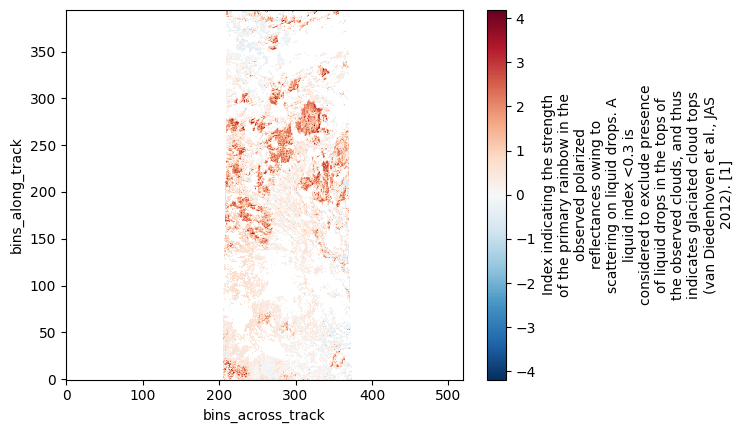

In [7]:
ds.cloud_liquid_index.plot()

In [12]:
ds["cloud_liquid_index_mask"] = (ds.cloud_liquid_index > 0.3)

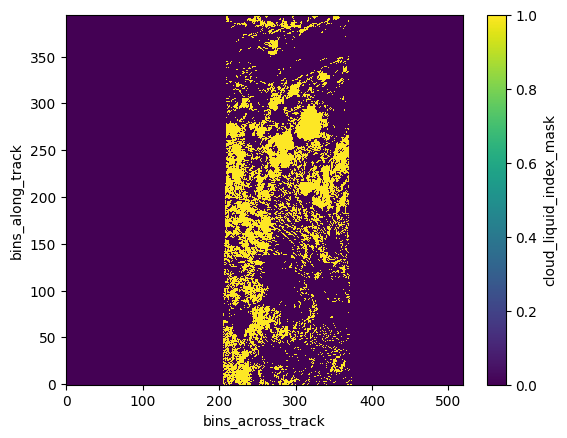

In [13]:
ds.cloud_liquid_index_mask.plot()

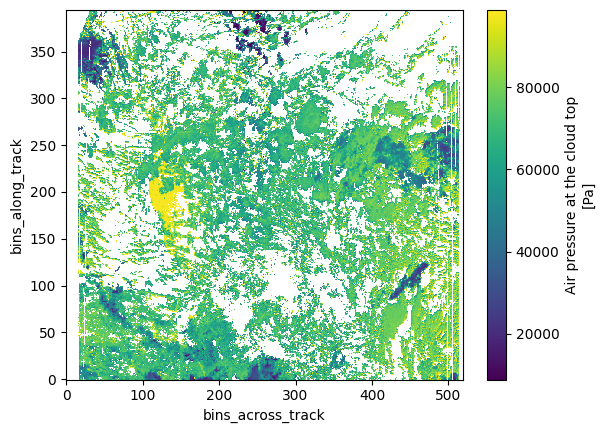

In [8]:
ds.cloud_top_pressure.plot()

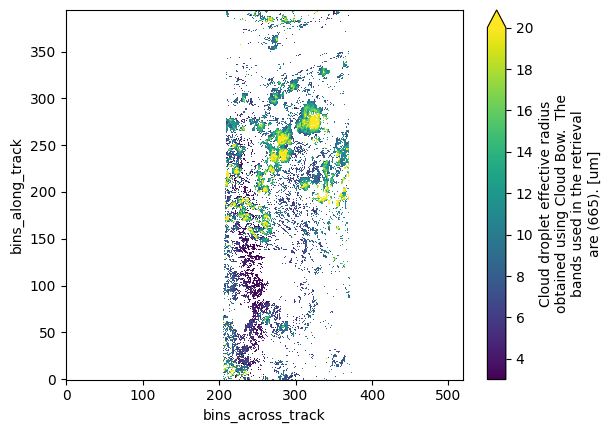

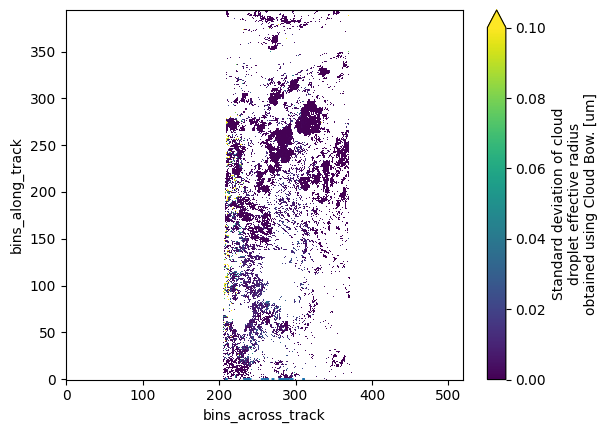

In [9]:
ds.cloud_bow_droplet_effective_radius.plot(vmax=20)
plt.show()
ds.cloud_bow_droplet_effective_radius_stddev.plot(vmin=0,vmax=0.1)
plt.plot(ds.cloud_bow_droplet_effective_radius_stddev.data.flatten())

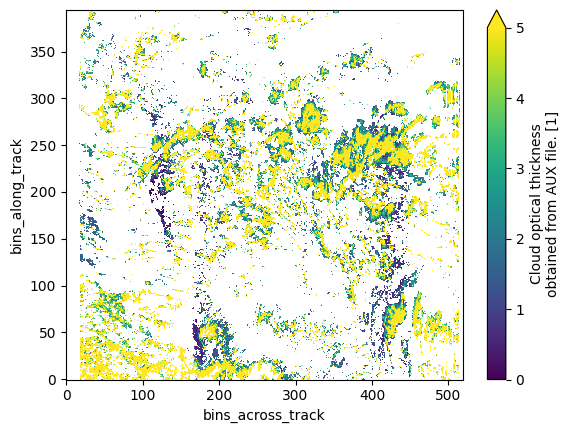

In [10]:
ds.cloud_optical_thickness.plot(vmin=0,vmax=5)

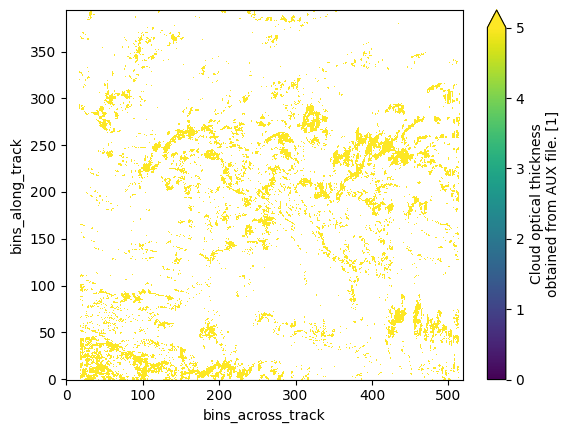

In [11]:
ds_filter = ds.where(ds.cloud_optical_thickness >= 5)
ds_filter.cloud_optical_thickness.plot(vmin=0,vmax=5)